In [1]:
#pip install -U pip

In [ ]:
#pip install -U setuptools wheel

   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ----------------- ---------------------- 0.5/1.2 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 4.6 MB/s eta 0:00:00
  Attempting uninstall: setuptools
    Found existing installation: setuptools 78.1.1
    Uninstalling setuptools-78.1.1:
      Successfully uninstalled setuptools-78.1.1
Note: you may need to restart the kernel to use updated packages.


In [ ]:
#pip install autogluon.tabular

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/13.8 MB ? eta -:--:--
   --- ------------------------------------ 1.0/13.8 MB 5.6 MB/s eta 0:00:03
   ---- ----------------------------------- 1.6/13.8 MB 3.5 MB/s eta 0:00:04
   ------ --------------------------------- 2.4/13.8 MB 3.8 MB/s eta 0:00:03
   --------- ------------------------------ 3.1/13.8 MB 3.8 MB/s eta 0:00:03
   ---------- ----------------------------- 3.7/13.8 MB 3.6 MB/s eta 0:00:03
   ------------- -------------------------- 4.7/13.8 MB 3.8 MB/s eta 0:00:03
   ---------------- ----------------------- 5.8/13.8 MB 3.8 MB/s eta 0:00:03
   ------------------ --------------------- 6.3/13.8 MB 3.8 MB/s eta 0:00:02
   --------------------- ------------------ 7.3/13.8 MB 3.8 MB/s eta 0:00:02
   ----------------------- ---------------- 8.1/13.8 MB 3.9 MB/s eta 0:00:02
   ------------------------- -------------- 8.9/13.8 MB 3.8 MB/s eta 0:00:02
   ----------------

In [ ]:
# exploramos autogluon
#https://auto.gluon.ai/stable/index.html


#conda create -n AutoGluon python=3.11 -y
#conda install xgboost
#conda install -c conda-forge autogluon
# o:   pip install autogluon
# o, para CPU:  pip install autogluon --extra-index-url https://download.pytorch.org/whl/cpu   
# For example, to install autogluon.tabular[lightgbm,catboost] from source, the command would be: 
# cd autogluon && pip install -e tabular/[lightgbm,catboost]

In [ ]:
#In this tutorial, we will see how to use AutoGluon’s TabularPredictor 
# to predict the values of a target column based on the other columns in a tabular dataset.

In [1]:
from autogluon.tabular import TabularDataset, TabularPredictor

# conda install -c conda-forge ipywidgets
# For this tutorial we will use a dataset from the cover story of Nature issue 7887:
# AI-guided intuition for math theorems.

# pandas DataFrame, standard pandas methods on it (e.g., .head(), .info(), .columns

data_url = 'https://raw.githubusercontent.com/mli/ag-docs/main/knot_theory/'
train_data = TabularDataset(f'{data_url}train.csv')
train_data.head()

c:\Users\econo\.conda\envs\autogluonSHAP\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Unnamed: 0,chern_simons,cusp_volume,hyperbolic_adjoint_torsion_degree,hyperbolic_torsion_degree,injectivity_radius,longitudinal_translation,meridinal_translation_imag,meridinal_translation_real,short_geodesic_imag_part,short_geodesic_real_part,Symmetry_0,Symmetry_D3,Symmetry_D4,Symmetry_D6,Symmetry_D8,Symmetry_Z/2 + Z/2,volume,signature
0,70746,0.090530,12.226322,0,10,0.507756,10.685555,1.144192,-0.519157,-2.760601,1.015512,0.0,0.0,0.0,0.0,0.0,1.0,11.393225,-2
1,240827,0.232453,13.800773,0,14,0.413645,10.453156,1.320249,-0.158522,-3.013258,0.827289,0.0,0.0,0.0,0.0,0.0,1.0,12.742782,0
2,155659,-0.144099,14.761030,0,14,0.436928,13.405199,1.101142,0.768894,2.233106,0.873856,0.0,0.0,0.0,0.0,0.0,0.0,15.236505,2
3,239963,-0.171668,13.738019,0,22,0.249481,27.819496,0.493827,-1.188718,-2.042771,0.498961,0.0,0.0,0.0,0.0,0.0,0.0,17.279890,-8
4,90504,0.235188,15.896359,0,10,0.389329,15.330971,1.036879,0.722828,-3.056138,0.778658,0.0,0.0,0.0,0.0,0.0,0.0,16.749298,4


In [2]:
#Our targets are stored in the “signature” column, which has 18 unique integers. 
#Even though pandas didn’t correctly recognize this data type as categorical, AutoGluon will fix this issue.

label = 'signature'
train_data[label].describe()

count    10000.000000
mean        -0.022000
std          3.025166
min        -12.000000
25%         -2.000000
50%          0.000000
75%          2.000000
max         12.000000
Name: signature, dtype: float64

In [3]:
predictor = TabularPredictor(label=label).fit(train_data)

No path specified. Models will be saved in: "AutogluonModels\ag-20250703_005157"
Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.3.1
Python Version:     3.11.13
Operating System:   Windows
Platform Machine:   AMD64
Platform Version:   10.0.26200
CPU Count:          8
Memory Avail:       0.94 GB / 7.74 GB (12.1%)
Disk Space Avail:   14.64 GB / 220.13 GB (6.6%)
No presets specified! To achieve strong results with AutoGluon, it is recommended to use the available presets. Defaulting to `'medium'`...
	Recommended Presets (For more details refer to https://auto.gluon.ai/stable/tutorials/tabular/tabular-essentials.html#presets):
	presets='experimental' : New in v1.2: Pre-trained foundation model + parallel fits. The absolute best accuracy without consideration for inference speed. Does not support GPU.
	presets='best'         : Maximize accuracy. Recommended for most users. Use in competitions and benchmarks.
	presets='high'         :



# inside your AutoGluon env
pip uninstall -y xgboost        
pip install "xgboost==2.1.4"    
python -c "import xgboost, sklearn, platform, sys; print('xgboost', xgboost.__version__); print('scikit-learn', sklearn.__version__); print('Python', sys.version.split()[0], platform.platform())"




In [4]:
test_data = TabularDataset(f'{data_url}test.csv')

y_pred = predictor.predict(test_data.drop(columns=[label]))
y_pred.head()

Loaded data from: https://raw.githubusercontent.com/mli/ag-docs/main/knot_theory/test.csv | Columns = 19 / 19 | Rows = 5000 -> 5000


0   -4
1    0
2    0
3    4
4    2
Name: signature, dtype: int64

In [5]:
#evaluacion
predictor.evaluate(test_data, silent=True)

{'accuracy': 0.938,
 'balanced_accuracy': np.float64(0.7094098465141254),
 'mcc': np.float64(0.9239995866824326)}

In [15]:
predictor.leaderboard(test_data)

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,RandomForestEntr,0.9384,0.949950,accuracy,0.298651,0.078075,2.295334,0.298651,0.078075,2.295334,1,True,4
1,WeightedEnsemble_L2,0.9380,0.951952,accuracy,1.148825,0.158548,3.440217,0.075457,0.002452,0.040000,2,True,7
2,ExtraTreesGini,0.9360,0.946947,accuracy,0.659034,0.056209,1.074310,0.659034,0.056209,1.074310,1,True,5
3,ExtraTreesEntr,0.9358,0.942943,accuracy,0.674496,0.079906,1.207823,0.674496,0.079906,1.207823,1,True,6
4,RandomForestGini,0.9352,0.944945,accuracy,0.405982,0.057060,1.661790,0.405982,0.057060,1.661790,1,True,3
5,KNeighborsDist,0.2210,0.213213,accuracy,0.035881,0.017646,0.017962,0.035881,0.017646,0.017962,1,True,2
6,KNeighborsUnif,0.2180,0.223223,accuracy,0.115682,0.021812,0.030573,0.115682,0.021812,0.030573,1,True,1


score_val	accuracy on AutoGluon’s internal validation split (created automatically during training)	used to decide which models feed the ensemble and how much weight each gets

eval_metric	the metric the predictor optimized

score_test	accuracy on the data you passed to predictor.evaluate(test_data) this is the unseen performance you really care about

cálculo de SHAP

could be necesary to change: X_rows      = X_test_raw.iloc[:rows_to_exp] 
and check the consistency of the rest of the code

In [ ]:
import shap
import matplotlib.pyplot as plt

# 1. Cargar modelo específico
model_name = 'RandomForestGini'
model = predictor._trainer.load_model(model_name)

# 2. Obtener los datos transformados como los usó AutoGluon internamente
X_test_transformed = predictor.transform_features(test_data)

# 3. Crear explainer de SHAP con el modelo crudo de LightGBM
explainer = shap.Explainer(model.model, X_test_transformed)

# 4. Calcular valores SHAP
shap_values = explainer(X_test_transformed)

# 5. Visualizar el resumen SHAP
shap.summary_plot(shap_values, X_test_transformed)


  0%|                   | 217/45000 [00:23<79:06]       

In [1]:
model_names = predictor.get_model_names()
print(model_names)


NameError: name 'predictor' is not defined

In [ ]:
# buena idea pasar el shap de estas matrices al copilot antes de correr el código que sigue
print("shap_matrix shape :", shap_matrix.shape)   # (rows, ?)
print("X_rows shape      :", X_rows.shape)        # (rows, p)


shap_matrix shape : (18, 13)
X_rows shape      : (50, 18)


the beeswarm plot displays SHAP values for each feature across all examples,
with colors indicating how the SHAP values correlate with feature values

Does the same “Tree SHAP” code work for any other models in the leaderboard?
Yes, for every tree-based base model —but not for models that aren’t trees, and not for the level-2 stacker.

AutoGluon’s level-2 stacker is not fed your 18 knot-theory columns.
Its inputs are the predicted probabilities coming from the level-1 models
(LightGBM, XGB, CatBoost, …).
When SHAP perturbs “crossing_number” or “hyperbolic_volume” the stacker’s
input vector doesn’t change, so φ = 0 for every raw feature.

Changing to another AutoML library won’t fix that: any meta-stacker that
operates on model outputs instead of raw features will have the same
property.

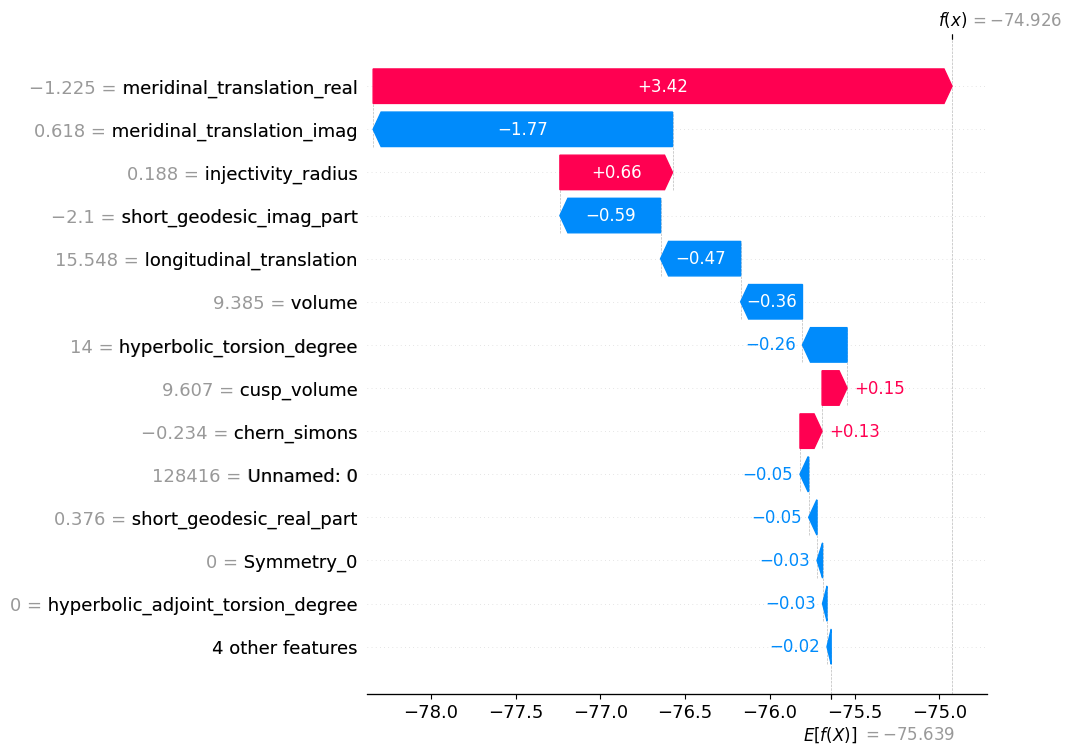

In [20]:
sample_ind = 0  # or any valid row index
shap.plots.waterfall(shap_values[sample_ind], max_display=14)
